<a href="https://colab.research.google.com/github/heidaralavi/Gas-Prj/blob/main/Gas_Prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pillow

In [2]:
import pandas as pd

دریافت داده های اولیه

In [3]:
df1=pd.read_csv('https://raw.githubusercontent.com/heidaralavi/Gas-Prj/main/data-1.csv')

In [4]:
df1.head()

,Date,Time,Disk_Number,Moisture_600
0,3/21/2019,1:45,1,9.3
1,3/21/2019,3:45,1,9.2
2,3/21/2019,5:45,1,9.6
3,3/21/2019,7:45,1,9.0
4,3/21/2019,9:45,1,8.7


In [5]:
df1.insert(loc=0, column='new_date', value=df1['Date']+' '+df1['Time'])

In [6]:
from datetime import datetime, timedelta
df1['new_date']=pd.to_datetime(df1['new_date'])
df1['new_date']=df1['new_date']-timedelta( minutes=0, hours=7)
df1['new_date']=df1['new_date'].dt.date
df1.drop(['Date','Time','Disk_Number'],axis=1,inplace=True)
df1=df1.groupby(['new_date']).mean()
df1

,Moisture_600
new_date,
2019-03-20,9.333333
2019-03-21,9.043056
2019-03-22,9.068056
2019-03-23,8.997183
2019-03-24,8.795833
...,...
2022-01-11,8.968056
2022-01-12,8.986111
2022-01-13,9.172222


In [7]:
df2=pd.read_csv('https://raw.githubusercontent.com/heidaralavi/Gas-Prj/main/data-2.csv')
df2

,Date,Time,Blaine_After_HPGR
0,3/21/2019,5:05,1917
1,3/21/2019,7:05,1917
2,3/21/2019,9:05,1890
3,3/21/2019,11:05,1917
4,3/21/2019,13:05,1943
...,...,...,...
9205,1/14/2022,22:55,1858
9206,1/15/2022,0:50,1879
9207,1/15/2022,2:45,1817
9208,1/15/2022,4:45,1685


In [8]:
df2.insert(loc=0, column='new_date', value=df2['Date']+' '+df2['Time'])
df2['new_date']=pd.to_datetime(df2['new_date'])
df2['new_date']=df2['new_date']-timedelta( minutes=0, hours=7)
df2['new_date']=df2['new_date'].dt.date
df2.drop(['Date','Time'],axis=1,inplace=True)
df2=df2.groupby(['new_date']).mean()
df2

,Blaine_After_HPGR
new_date,
2019-03-20,1917.000000
2019-03-21,1875.416667
2019-03-22,1944.333333
2019-03-23,2014.000000
2019-03-24,2036.909091
...,...
2022-01-10,1895.250000
2022-01-11,1887.000000
2022-01-12,1840.727273


In [9]:
df3=pd.read_csv('https://raw.githubusercontent.com/heidaralavi/Gas-Prj/main/data-3.csv')
df3

,Date,Time,Tfe_Before_Mixer
0,3/21/2019,2:00,66.64
1,3/21/2019,10:00,66.88
2,3/21/2019,18:00,67.35
3,3/22/2019,2:00,66.90
4,3/22/2019,10:00,66.88
...,...,...,...
2435,1/14/2022,18:00,67.71
2436,1/15/2022,2:00,67.68
2437,1/15/2022,10:00,67.74
2438,NaN,NaN,NaN


In [10]:
df3.insert(loc=0, column='new_date', value=df3['Date']+' '+df3['Time'])
df3['new_date']=pd.to_datetime(df3['new_date'])
df3['new_date']=df3['new_date']-timedelta( minutes=0, hours=7)
df3['new_date']=df3['new_date'].dt.date
df3.drop(['Date','Time'],axis=1,inplace=True)
df3=df3.groupby(['new_date']).mean()
df3

,Tfe_Before_Mixer
new_date,
2019-03-20,66.640000
2019-03-21,67.043333
2019-03-22,66.943333
2019-03-23,66.873333
2019-03-24,66.873333
...,...
2022-01-11,67.726667
2022-01-12,67.786667
2022-01-13,67.790000


In [11]:
df4=pd.read_csv('https://raw.githubusercontent.com/heidaralavi/Gas-Prj/main/data-4.csv')
df4

,Date,Time,FeO_Before_Mixer
0,3/21/2019,2:00,21.51
1,3/21/2019,10:00,21.97
2,3/21/2019,18:00,21.66
3,3/22/2019,2:00,21.47
4,3/22/2019,10:00,21.66
...,...,...,...
2455,1/14/2022,10:00,24.90
2456,1/14/2022,18:00,24.20
2457,1/15/2022,2:00,25.22
2458,1/15/2022,10:00,25.15


In [12]:
df4.insert(loc=0, column='new_date', value=df4['Date']+' '+df4['Time'])
df4['new_date']=pd.to_datetime(df4['new_date'])
df4['new_date']=df4['new_date']-timedelta( minutes=0, hours=7)
df4['new_date']=df4['new_date'].dt.date
df4.drop(['Date','Time'],axis=1,inplace=True)
df4=df4.groupby(['new_date']).mean()
df3

,Tfe_Before_Mixer
new_date,
2019-03-20,66.640000
2019-03-21,67.043333
2019-03-22,66.943333
2019-03-23,66.873333
2019-03-24,66.873333
...,...
2022-01-11,67.726667
2022-01-12,67.786667
2022-01-13,67.790000


In [13]:
df5=pd.read_csv('https://raw.githubusercontent.com/heidaralavi/Gas-Prj/main/data-5.csv')
df5

,Date,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
0,3/22/2019,23.000000,12130.79,6.178099,129.977407,113.830519,96.924823,823.695961,947.918406,16.426996,1.720463,1.722029,33.128261,185.063912,141.628364,196364
1,3/23/2019,23.533333,12383.61,6.197217,130.267644,111.230717,97.945284,791.477252,928.687125,16.367289,1.720708,1.634924,32.501389,183.892294,145.570481,209304
2,3/24/2019,23.400000,12413.71,5.976046,133.678219,111.999794,99.243076,830.765571,939.656421,18.876778,1.720636,1.650556,31.961806,180.630365,173.127236,206200
3,3/25/2019,23.583333,12277.02,5.978728,129.616905,114.068555,102.256167,825.551090,924.538606,21.236601,1.720821,1.590273,31.493056,177.220492,179.281210,203772
4,3/26/2019,19.883333,9942.13,4.718885,138.999936,115.877855,100.122762,724.071424,910.241250,18.896511,1.708230,1.278280,26.135069,163.096300,129.430960,200120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1/12/2022,23.866667,13917.40,6.823813,135.632708,122.608771,101.286145,833.420843,1046.504529,10.624824,1.600272,1.883470,47.734722,214.731415,199.714990,236188
1028,1/13/2022,24.000000,13877.86,6.800226,133.996400,128.817429,99.126857,839.547875,1033.976739,13.563287,1.600260,1.877287,47.829167,212.482063,210.040164,217142
1029,1/14/2022,24.000000,14141.74,6.838797,140.446941,119.666136,102.325955,855.800169,1041.405444,14.932269,1.600373,1.877709,48.894444,209.744992,220.770072,216634
1030,1/15/2022,23.583333,13646.10,6.667394,140.958807,124.459014,105.202023,844.156492,1037.729008,16.152037,1.600322,1.815676,47.945139,205.176090,218.651203,213588


In [14]:
df5.insert(loc=0, column='new_date', value=df5['Date'])
df5['new_date']=pd.to_datetime(df5['new_date'])
df5['new_date']=df5['new_date'].dt.date
df5.drop(['Date'],axis=1,inplace=True)
df5=df5.groupby(['new_date']).mean()
df5

,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,
2019-03-22,23.000000,12130.79,6.178099,129.977407,113.830519,96.924823,823.695961,947.918406,16.426996,1.720463,1.722029,33.128261,185.063912,141.628364,196364
2019-03-23,23.533333,12383.61,6.197217,130.267644,111.230717,97.945284,791.477252,928.687125,16.367289,1.720708,1.634924,32.501389,183.892294,145.570481,209304
2019-03-24,23.400000,12413.71,5.976046,133.678219,111.999794,99.243076,830.765571,939.656421,18.876778,1.720636,1.650556,31.961806,180.630365,173.127236,206200
2019-03-25,23.583333,12277.02,5.978728,129.616905,114.068555,102.256167,825.551090,924.538606,21.236601,1.720821,1.590273,31.493056,177.220492,179.281210,203772
2019-03-26,19.883333,9942.13,4.718885,138.999936,115.877855,100.122762,724.071424,910.241250,18.896511,1.708230,1.278280,26.135069,163.096300,129.430960,200120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,23.866667,13917.40,6.823813,135.632708,122.608771,101.286145,833.420843,1046.504529,10.624824,1.600272,1.883470,47.734722,214.731415,199.714990,236188
2022-01-13,24.000000,13877.86,6.800226,133.996400,128.817429,99.126857,839.547875,1033.976739,13.563287,1.600260,1.877287,47.829167,212.482063,210.040164,217142
2022-01-14,24.000000,14141.74,6.838797,140.446941,119.666136,102.325955,855.800169,1041.405444,14.932269,1.600373,1.877709,48.894444,209.744992,220.770072,216634


ادغام تمام دیتافریم ها در یک دیتافریم

In [15]:
from functools import reduce

In [16]:
data_frames = [df1, df2, df3,df4,df5]
df = reduce(lambda  left,right: pd.merge(left,right,on=['new_date'],how='outer'), data_frames)

In [17]:
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,,,,,
2019-03-20,9.333333,1917.000000,66.640000,21.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,9.043056,1875.416667,67.043333,21.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.830519,96.924823,823.695961,947.918406,16.426996,1.720463,1.722029,33.128261,185.063912,141.628364,196364.0
2019-03-23,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.230717,97.945284,791.477252,928.687125,16.367289,1.720708,1.634924,32.501389,183.892294,145.570481,209304.0
2019-03-24,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,111.999794,99.243076,830.765571,939.656421,18.876778,1.720636,1.650556,31.961806,180.630365,173.127236,206200.0


In [18]:
df=df.groupby(['new_date']).mean()

In [19]:
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,,,,,
2019-03-20,9.333333,1917.000000,66.640000,21.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,9.043056,1875.416667,67.043333,21.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.830519,96.924823,823.695961,947.918406,16.426996,1.720463,1.722029,33.128261,185.063912,141.628364,196364.0
2019-03-23,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.230717,97.945284,791.477252,928.687125,16.367289,1.720708,1.634924,32.501389,183.892294,145.570481,209304.0
2019-03-24,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,111.999794,99.243076,830.765571,939.656421,18.876778,1.720636,1.650556,31.961806,180.630365,173.127236,206200.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

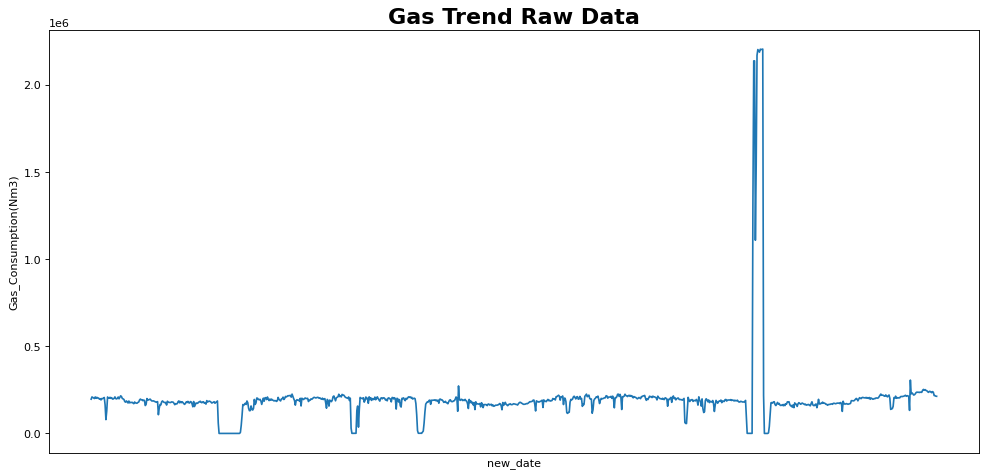

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend Raw Data', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )
#Download to local drive
File_Name='Gas_Trend_Raw_Data.jpg'
plt.savefig(File_Name)
from google.colab import files
files.download(File_Name)

In [23]:
cols=['Moisture_600','Blaine_After_HPGR','Tfe_Before_Mixer','FeO_Before_Mixer']
df[cols] = df[cols].ffill()

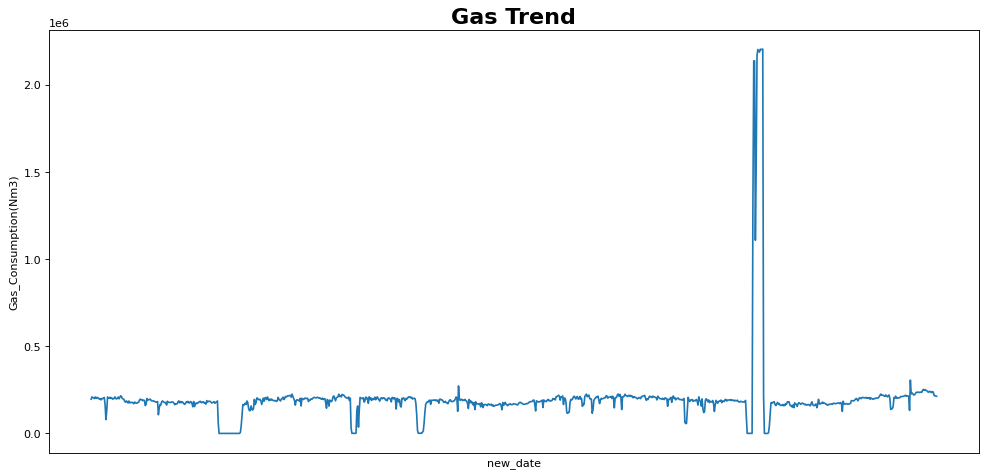

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )

In [25]:
import numpy as np
df['Grate_Feed(ton)'] = np.where(df['Grate_Feed(ton)'] <= 5 , 0.0, df['Grate_Feed(ton)'])
#df['Grate_Feed(ton)'] = np.where(df['Grate_Feed(ton)'] > 16550.0 , None, df['Grate_Feed(ton)']) #??????
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,,,,,
2019-03-20,9.333333,1917.000000,66.640000,21.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,9.043056,1875.416667,67.043333,21.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.830519,96.924823,823.695961,947.918406,16.426996,1.720463,1.722029,33.128261,185.063912,141.628364,196364.0
2019-03-23,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.230717,97.945284,791.477252,928.687125,16.367289,1.720708,1.634924,32.501389,183.892294,145.570481,209304.0
2019-03-24,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,111.999794,99.243076,830.765571,939.656421,18.876778,1.720636,1.650556,31.961806,180.630365,173.127236,206200.0


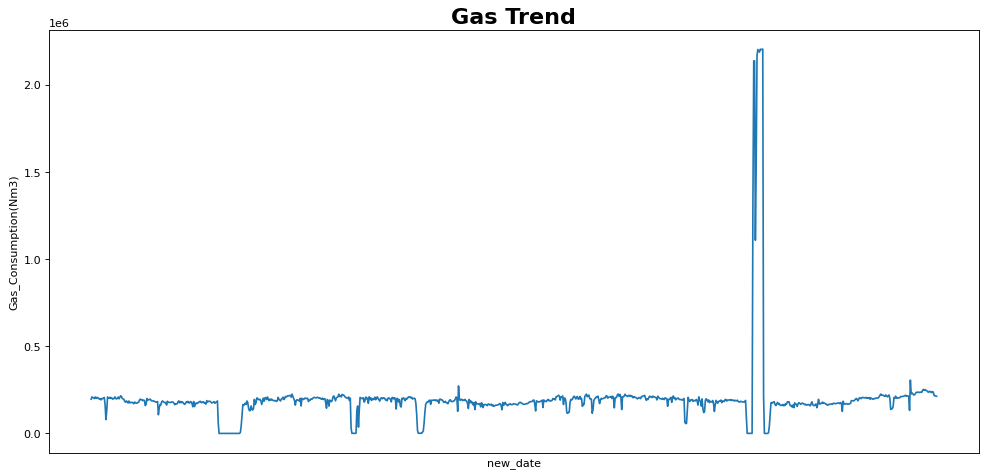

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )

In [27]:
df['Grate_Speed(rpm)'] = np.where(df['Grate_Speed(rpm)'] < 0 , 0.0, df['Grate_Speed(rpm)'])
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,,,,,
2019-03-20,9.333333,1917.000000,66.640000,21.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,9.043056,1875.416667,67.043333,21.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.830519,96.924823,823.695961,947.918406,16.426996,1.720463,1.722029,33.128261,185.063912,141.628364,196364.0
2019-03-23,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.230717,97.945284,791.477252,928.687125,16.367289,1.720708,1.634924,32.501389,183.892294,145.570481,209304.0
2019-03-24,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,111.999794,99.243076,830.765571,939.656421,18.876778,1.720636,1.650556,31.961806,180.630365,173.127236,206200.0


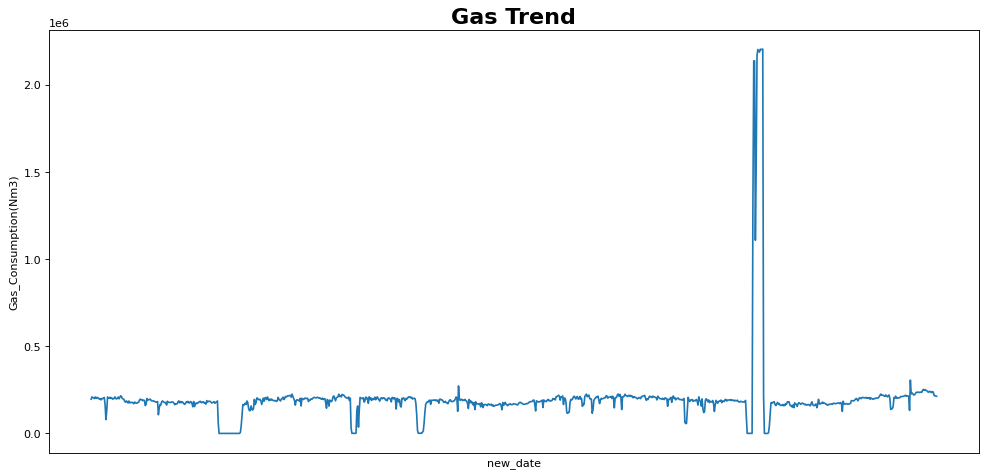

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )

In [29]:
df['Grate_Zoon4_Temp(deg)']=np.where(df['Grate_Zoon4_Temp(deg)'] < 5 , None, df['Grate_Zoon4_Temp(deg)'])
df['Grate_Zoon4_Temp(deg)']=np.where(df['Grate_Zoon4_Temp(deg)'] > 1390 , None, df['Grate_Zoon4_Temp(deg)'])
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,,,,,
2019-03-20,9.333333,1917.000000,66.640000,21.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,9.043056,1875.416667,67.043333,21.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.830519,96.924823,823.695961,947.918,16.426996,1.720463,1.722029,33.128261,185.063912,141.628364,196364.0
2019-03-23,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.230717,97.945284,791.477252,928.687,16.367289,1.720708,1.634924,32.501389,183.892294,145.570481,209304.0
2019-03-24,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,111.999794,99.243076,830.765571,939.656,18.876778,1.720636,1.650556,31.961806,180.630365,173.127236,206200.0


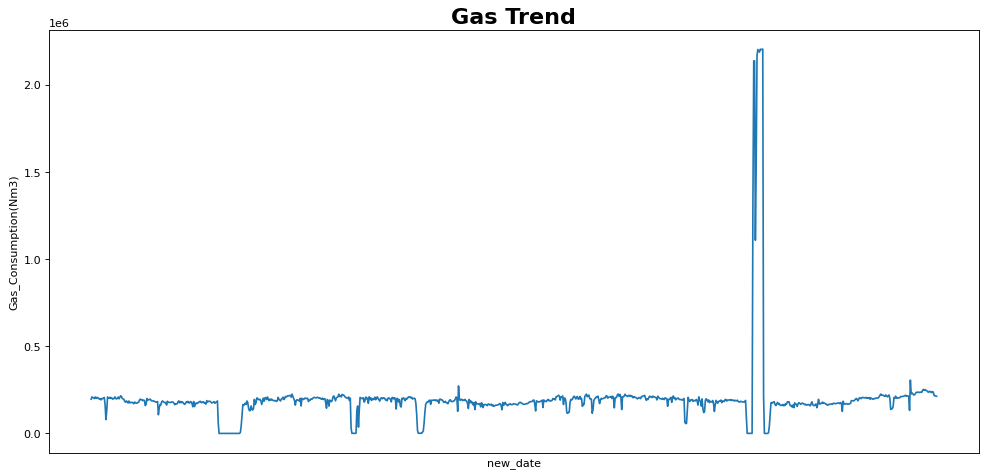

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )

In [31]:
df['Grate_Zoon3_Temp(deg)']=np.where(df['Grate_Zoon3_Temp(deg)'] > 1390 , None, df['Grate_Zoon3_Temp(deg)'])
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,,,,,
2019-03-20,9.333333,1917.000000,66.640000,21.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,9.043056,1875.416667,67.043333,21.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.830519,96.924823,823.696,947.918,16.426996,1.720463,1.722029,33.128261,185.063912,141.628364,196364.0
2019-03-23,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.230717,97.945284,791.477,928.687,16.367289,1.720708,1.634924,32.501389,183.892294,145.570481,209304.0
2019-03-24,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,111.999794,99.243076,830.766,939.656,18.876778,1.720636,1.650556,31.961806,180.630365,173.127236,206200.0


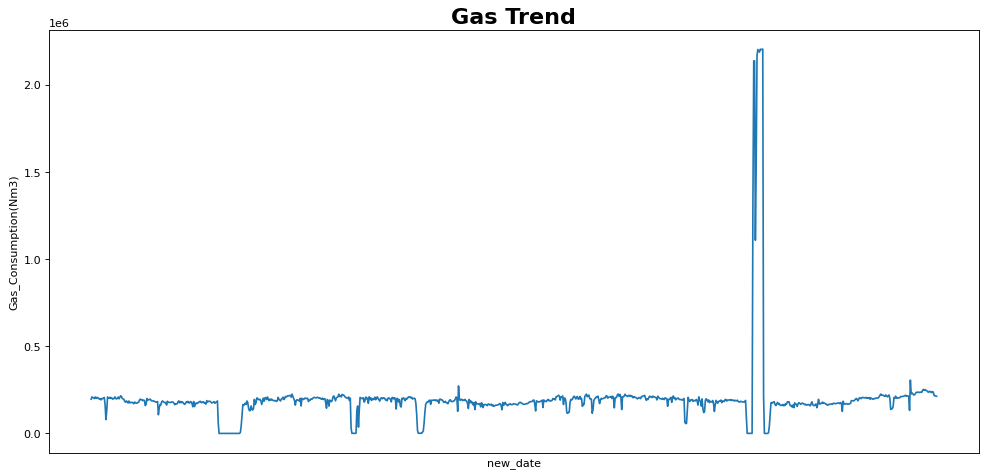

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )

In [33]:
df['Amb_Temp(deg)']=np.where(df['Amb_Temp(deg)'] > 60.0 , None, df['Amb_Temp(deg)'])
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,,,,,
2019-03-20,9.333333,1917.000000,66.640000,21.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,9.043056,1875.416667,67.043333,21.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.830519,96.924823,823.696,947.918,16.427,1.720463,1.722029,33.128261,185.063912,141.628364,196364.0
2019-03-23,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.230717,97.945284,791.477,928.687,16.3673,1.720708,1.634924,32.501389,183.892294,145.570481,209304.0
2019-03-24,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,111.999794,99.243076,830.766,939.656,18.8768,1.720636,1.650556,31.961806,180.630365,173.127236,206200.0


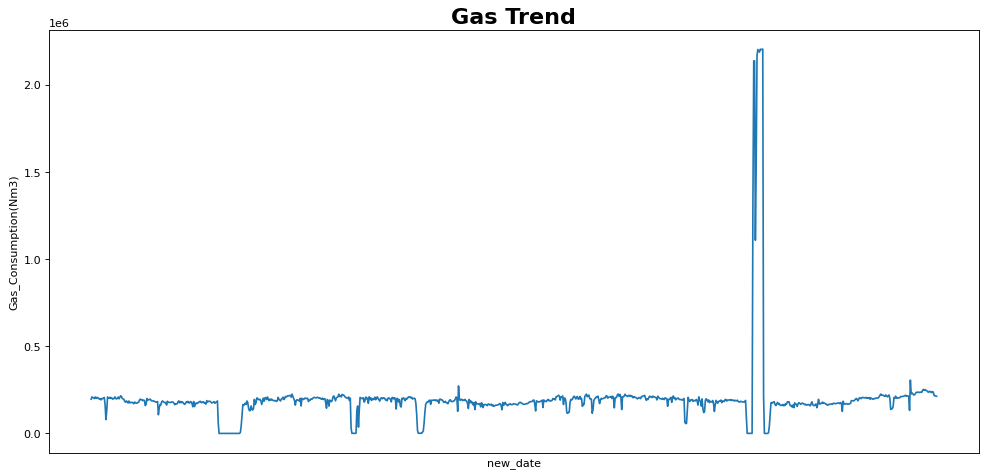

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )

In [35]:
df['730FN1_Amp']=np.where(df['730FN1_Amp'] > 200 , None, df['730FN1_Amp'])
df['730FN1_Amp']=np.where(df['730FN1_Amp'] <31 , 0.0, df['730FN1_Amp'])
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,,,,,
2019-03-20,9.333333,1917.000000,66.640000,21.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,9.043056,1875.416667,67.043333,21.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.830519,96.924823,823.696,947.918,16.427,1.720463,1.722029,33.128261,185.064,141.628364,196364.0
2019-03-23,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.230717,97.945284,791.477,928.687,16.3673,1.720708,1.634924,32.501389,183.892,145.570481,209304.0
2019-03-24,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,111.999794,99.243076,830.766,939.656,18.8768,1.720636,1.650556,31.961806,180.63,173.127236,206200.0


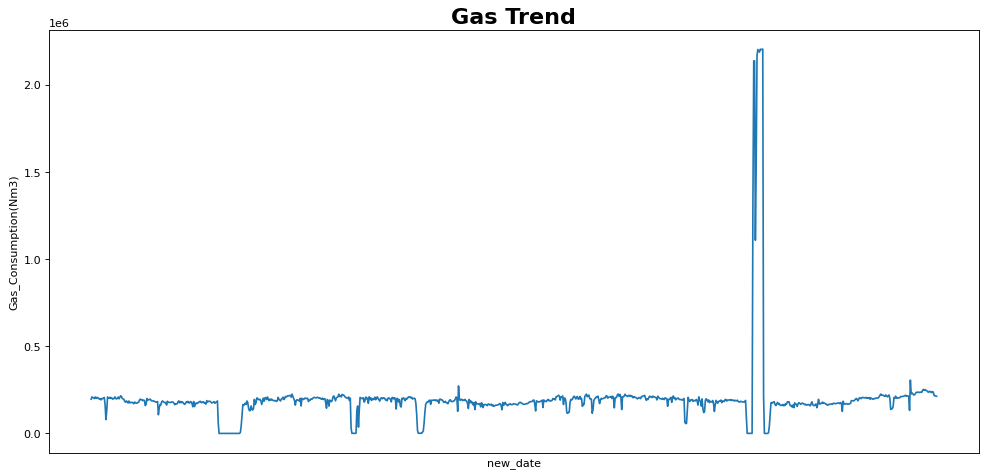

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )

In [37]:
df['EP1_Temp(deg)']=np.where(df['EP1_Temp(deg)'] > 200 , None, df['EP1_Temp(deg)'])
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,,,,,
2019-03-20,9.333333,1917.000000,66.640000,21.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,9.043056,1875.416667,67.043333,21.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.831,96.924823,823.696,947.918,16.427,1.720463,1.722029,33.128261,185.064,141.628364,196364.0
2019-03-23,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.231,97.945284,791.477,928.687,16.3673,1.720708,1.634924,32.501389,183.892,145.570481,209304.0
2019-03-24,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,112,99.243076,830.766,939.656,18.8768,1.720636,1.650556,31.961806,180.63,173.127236,206200.0


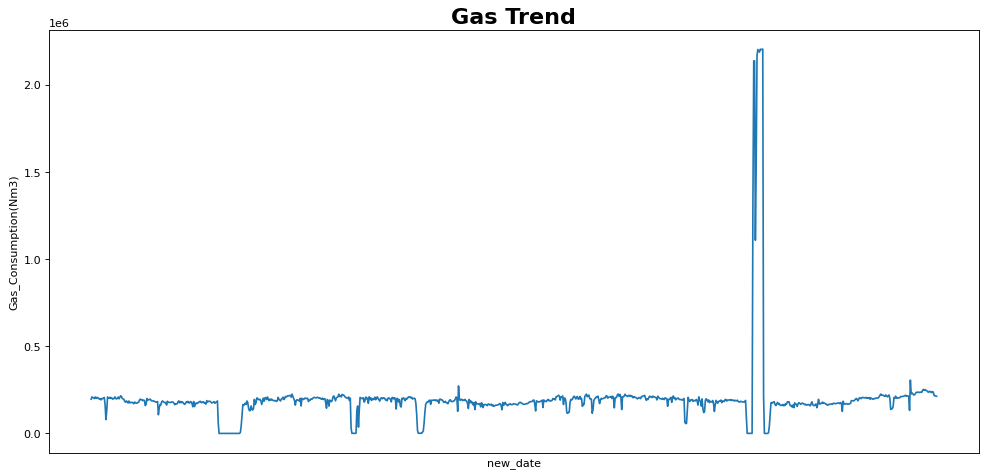

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )

In [39]:
df['AN1_Zoon3_Temp(deg)']=np.where(df['AN1_Zoon3_Temp(deg)'] > 200 , None, df['AN1_Zoon3_Temp(deg)'])
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,,,,,
2019-03-20,9.333333,1917.000000,66.640000,21.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,9.043056,1875.416667,67.043333,21.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.831,96.924823,823.696,947.918,16.427,1.720463,1.722029,33.128261,185.064,141.628,196364.0
2019-03-23,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.231,97.945284,791.477,928.687,16.3673,1.720708,1.634924,32.501389,183.892,145.57,209304.0
2019-03-24,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,112,99.243076,830.766,939.656,18.8768,1.720636,1.650556,31.961806,180.63,173.127,206200.0


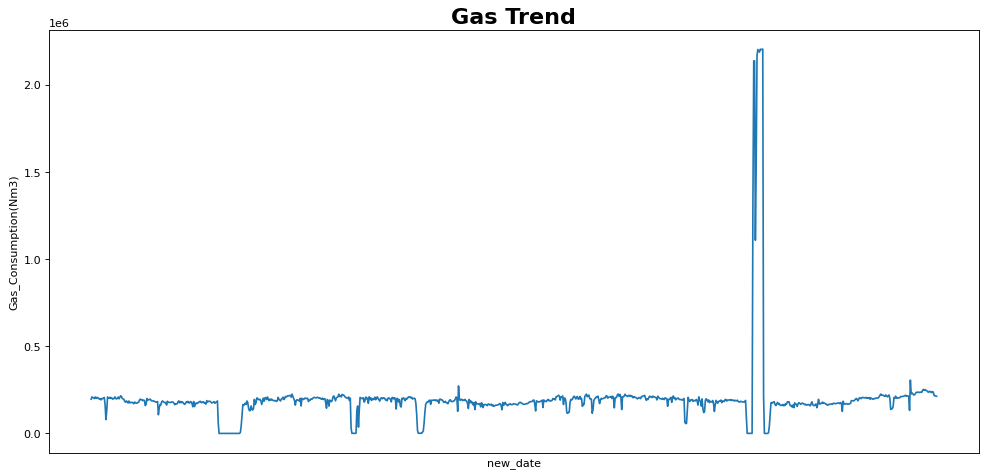

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )

In [41]:
df['Depth(mm)']=np.where(df['Depth(mm)'] < 20 , 0, df['Depth(mm)'])
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,,,,,
2019-03-20,9.333333,1917.000000,66.640000,21.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,9.043056,1875.416667,67.043333,21.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.831,96.924823,823.696,947.918,16.427,1.720463,1.722029,33.128261,185.064,141.628,196364.0
2019-03-23,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.231,97.945284,791.477,928.687,16.3673,1.720708,1.634924,32.501389,183.892,145.57,209304.0
2019-03-24,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,112,99.243076,830.766,939.656,18.8768,1.720636,1.650556,31.961806,180.63,173.127,206200.0


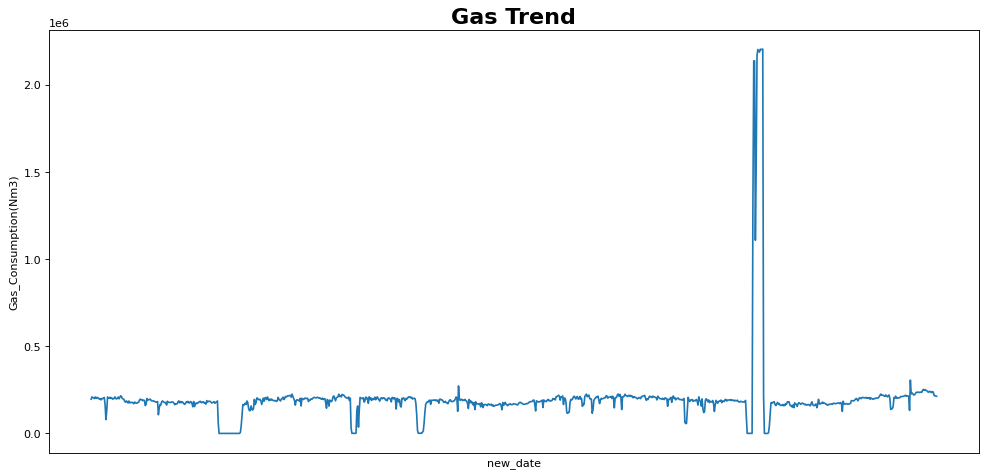

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )

In [43]:
df['730FN1_Damper']=np.where(df['730FN1_Damper'] > 75 , None, df['730FN1_Damper'])
df['730FN1_Damper']=np.where(df['730FN1_Damper'] <=3 , 0.0, df['730FN1_Damper'])
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,,,,,
2019-03-20,9.333333,1917.000000,66.640000,21.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,9.043056,1875.416667,67.043333,21.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.831,96.924823,823.696,947.918,16.427,1.720463,1.722029,33.1283,185.064,141.628,196364.0
2019-03-23,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.231,97.945284,791.477,928.687,16.3673,1.720708,1.634924,32.5014,183.892,145.57,209304.0
2019-03-24,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,112,99.243076,830.766,939.656,18.8768,1.720636,1.650556,31.9618,180.63,173.127,206200.0


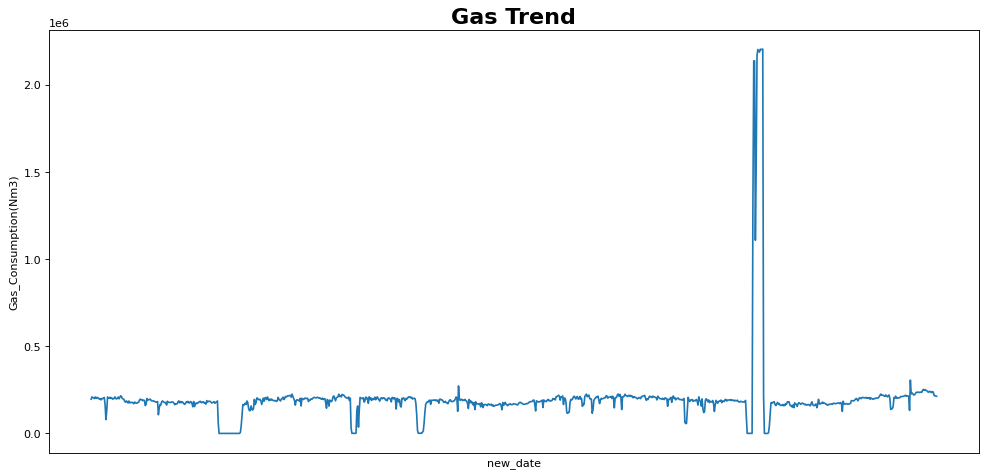

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )

In [45]:
df['Gas_Consumption(Nm3)']=np.where(df['Gas_Consumption(Nm3)'] > 1000000.0 , None, df['Gas_Consumption(Nm3)'])
df['Gas_Consumption(Nm3)']=np.where(df['Gas_Consumption(Nm3)'] <1500 , 0, df['Gas_Consumption(Nm3)'])
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,,,,,
2019-03-20,9.333333,1917.000000,66.640000,21.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,9.043056,1875.416667,67.043333,21.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.831,96.924823,823.696,947.918,16.427,1.720463,1.722029,33.1283,185.064,141.628,196364
2019-03-23,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.231,97.945284,791.477,928.687,16.3673,1.720708,1.634924,32.5014,183.892,145.57,209304
2019-03-24,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,112,99.243076,830.766,939.656,18.8768,1.720636,1.650556,31.9618,180.63,173.127,206200


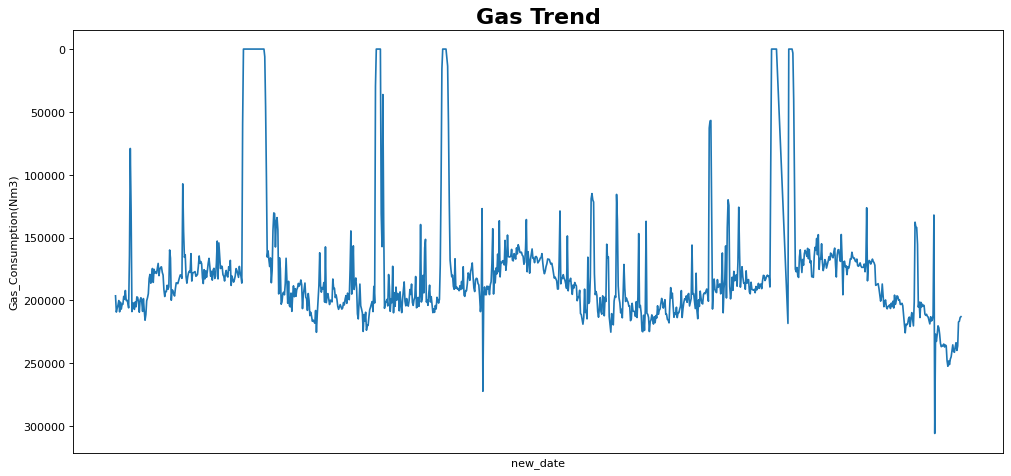

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )

In [47]:
filter = df['Grate_Feed(ton)'] != 0
df['Online_hours'].where(filter, other=0, inplace = True)
df['Grate_Speed(rpm)'].where(filter, other=0, inplace = True)
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,,,,,
2019-03-20,9.333333,1917.000000,66.640000,21.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,9.043056,1875.416667,67.043333,21.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.831,96.924823,823.696,947.918,16.427,1.720463,1.722029,33.1283,185.064,141.628,196364
2019-03-23,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.231,97.945284,791.477,928.687,16.3673,1.720708,1.634924,32.5014,183.892,145.57,209304
2019-03-24,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,112,99.243076,830.766,939.656,18.8768,1.720636,1.650556,31.9618,180.63,173.127,206200


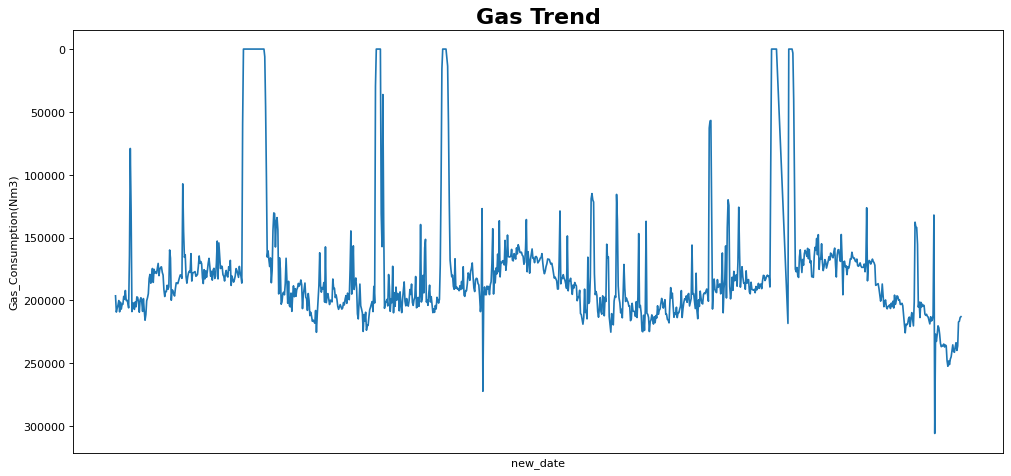

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )

In [49]:
filter = df['Grate_Speed(rpm)'] != 0
df['Grate_Feed(ton)'].where(filter, other=0, inplace = True)
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,,,,,
2019-03-20,9.333333,1917.000000,66.640000,21.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,9.043056,1875.416667,67.043333,21.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.831,96.924823,823.696,947.918,16.427,1.720463,1.722029,33.1283,185.064,141.628,196364
2019-03-23,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.231,97.945284,791.477,928.687,16.3673,1.720708,1.634924,32.5014,183.892,145.57,209304
2019-03-24,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,112,99.243076,830.766,939.656,18.8768,1.720636,1.650556,31.9618,180.63,173.127,206200


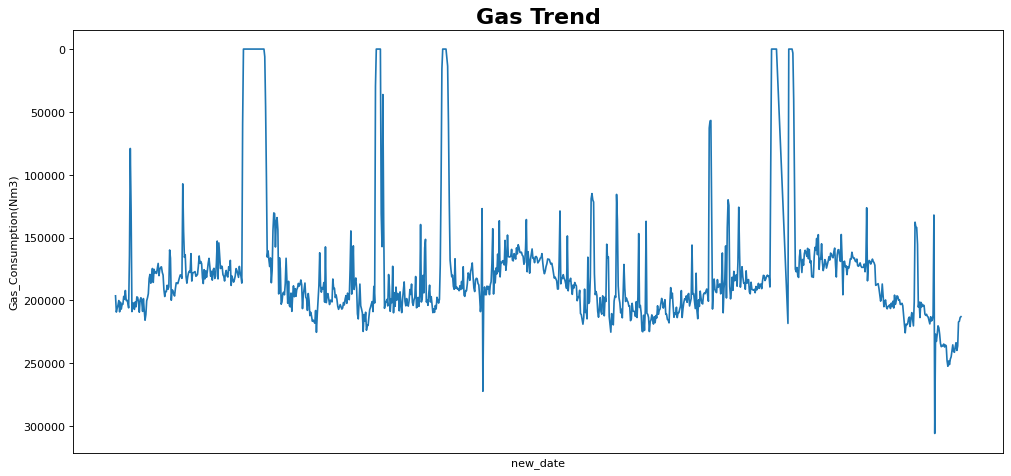

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )

In [51]:
filter = df['Depth(mm)'] != 0
df['Online_hours'].where(filter, other=0, inplace = True)
df['Grate_Speed(rpm)'].where(filter, other=0, inplace = True)
df['Grate_Feed(ton)'].where(filter, other=0, inplace = True)
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,,,,,
2019-03-20,9.333333,1917.000000,66.640000,21.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,9.043056,1875.416667,67.043333,21.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.831,96.924823,823.696,947.918,16.427,1.720463,1.722029,33.1283,185.064,141.628,196364
2019-03-23,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.231,97.945284,791.477,928.687,16.3673,1.720708,1.634924,32.5014,183.892,145.57,209304
2019-03-24,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,112,99.243076,830.766,939.656,18.8768,1.720636,1.650556,31.9618,180.63,173.127,206200


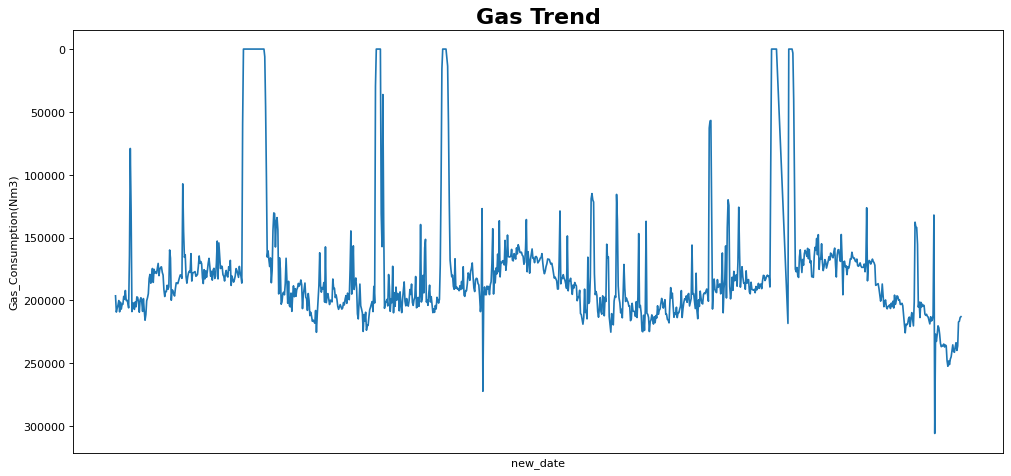

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )

In [53]:
cols=['EP1_Temp(deg)','EP2_Temp(deg)','Grate_Zoon3_Temp(deg)','Grate_Zoon3_Temp(deg)','Grate_Zoon4_Temp(deg)','Amb_Temp(deg)','730FN1_Amp','EP1_Temp(deg)','AN1_Zoon3_Temp(deg)','730FN1_Damper','Gas_Consumption(Nm3)']
df[cols] = df[cols].bfill()
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,,,,,
2019-03-20,9.333333,1917.000000,66.640000,21.510000,NaN,NaN,NaN,NaN,113.830519,96.924823,823.695961,947.918406,16.426996,NaN,NaN,33.128261,185.063912,141.628364,196364.0
2019-03-21,9.043056,1875.416667,67.043333,21.700000,NaN,NaN,NaN,NaN,113.830519,96.924823,823.695961,947.918406,16.426996,NaN,NaN,33.128261,185.063912,141.628364,196364.0
2019-03-22,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.830519,96.924823,823.695961,947.918406,16.426996,1.720463,1.722029,33.128261,185.063912,141.628364,196364.0
2019-03-23,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.230717,97.945284,791.477252,928.687125,16.367289,1.720708,1.634924,32.501389,183.892294,145.570481,209304.0
2019-03-24,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,111.999794,99.243076,830.765571,939.656421,18.876778,1.720636,1.650556,31.961806,180.630365,173.127236,206200.0


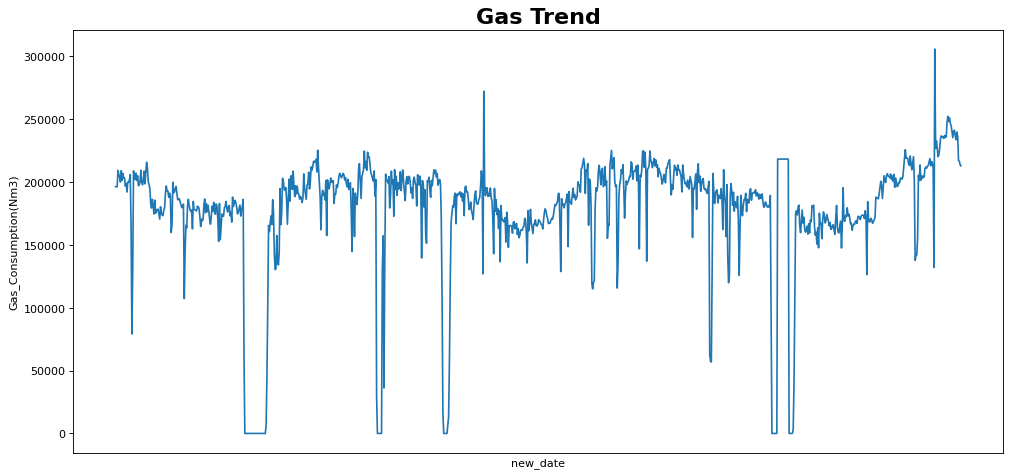

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )

In [55]:
df.isnull().sum()

Moisture_600             0
Blaine_After_HPGR        0
Tfe_Before_Mixer         0
FeO_Before_Mixer         0
Online_hours             2
Grate_Feed(ton)          2
Grate_Speed(rpm)         2
Depth(mm)                2
EP1_Temp(deg)            0
EP2_Temp(deg)            0
Grate_Zoon3_Temp(deg)    0
Grate_Zoon4_Temp(deg)    0
Amb_Temp(deg)            0
KL1_Speed(rpm)           2
AN1_Speed(rpm)           2
730FN1_Damper            0
730FN1_Amp               0
AN1_Zoon3_Temp(deg)      0
Gas_Consumption(Nm3)     0
dtype: int64

In [56]:
df.dropna(how='any',axis=0,inplace=True)
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
new_date,,,,,,,,,,,,,,,,,,,
2019-03-22,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.830519,96.924823,823.695961,947.918406,16.426996,1.720463,1.722029,33.128261,185.063912,141.628364,196364.0
2019-03-23,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.230717,97.945284,791.477252,928.687125,16.367289,1.720708,1.634924,32.501389,183.892294,145.570481,209304.0
2019-03-24,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,111.999794,99.243076,830.765571,939.656421,18.876778,1.720636,1.650556,31.961806,180.630365,173.127236,206200.0
2019-03-25,8.850536,2028.555556,66.986667,21.990000,23.583333,12277.02,5.978728,129.616905,114.068555,102.256167,825.551090,924.538606,21.236601,1.720821,1.590273,31.493056,177.220492,179.281210,203772.0
2019-03-26,9.006061,2034.181818,67.096667,21.846667,19.883333,9942.13,4.718885,138.999936,115.877855,100.122762,724.071424,910.241250,18.896511,1.708230,1.278280,26.135069,163.096300,129.430960,200120.0


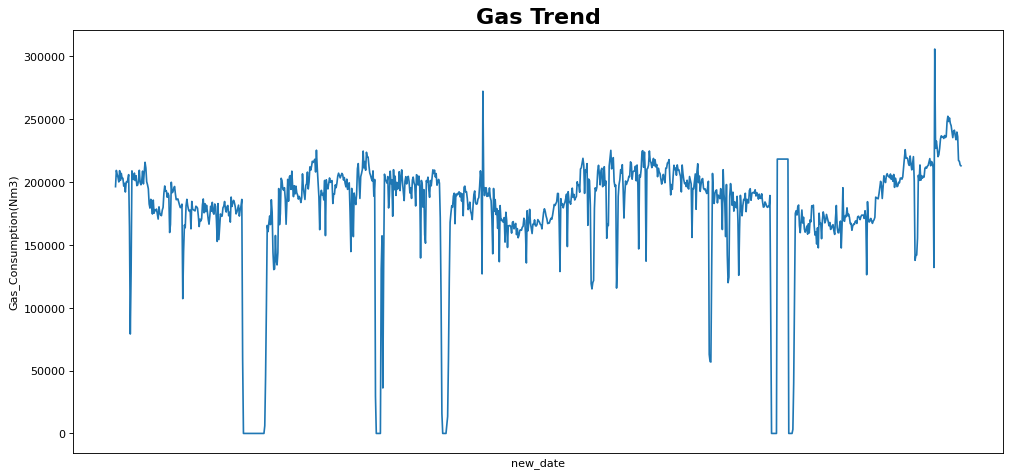

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )

In [58]:
df.isnull().sum()

Moisture_600             0
Blaine_After_HPGR        0
Tfe_Before_Mixer         0
FeO_Before_Mixer         0
Online_hours             0
Grate_Feed(ton)          0
Grate_Speed(rpm)         0
Depth(mm)                0
EP1_Temp(deg)            0
EP2_Temp(deg)            0
Grate_Zoon3_Temp(deg)    0
Grate_Zoon4_Temp(deg)    0
Amb_Temp(deg)            0
KL1_Speed(rpm)           0
AN1_Speed(rpm)           0
730FN1_Damper            0
730FN1_Amp               0
AN1_Zoon3_Temp(deg)      0
Gas_Consumption(Nm3)     0
dtype: int64

In [59]:
df.describe()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
count,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000
mean,9.069678,1927.503119,67.261702,22.937096,20.586146,10873.810107,5.109960,138.440028,120.305344,96.244828,704.447044,919.865161,24.420493,1.477392,1.424095,33.983000,165.684560,134.866443,177795.036857
std,0.201245,131.729774,0.443869,1.159832,7.282944,4148.389765,1.957164,40.329771,28.649019,23.112567,215.368076,240.482076,9.118896,0.433117,0.521730,10.971393,49.458764,44.760619,48655.147560
min,7.966667,1547.444444,65.805000,18.940000,0.000000,0.000000,0.000000,0.000000,13.945055,13.602836,24.101778,22.442126,5.423704,0.000000,0.000000,0.000000,0.000000,14.067186,0.000000
25%,8.932708,1834.641667,66.920000,22.116667,22.633333,11439.845000,5.299848,136.257943,113.134170,96.227514,732.729311,890.667605,16.171991,1.530259,1.473632,33.054340,173.133051,116.867392,170475.000000
50%,9.060294,1923.000000,67.293333,22.956667,23.966667,12663.140000,5.820490,147.020018,119.730376,102.533207,786.091415,1014.482965,24.272975,1.639975,1.623479,36.202778,183.513347,144.658786,188840.000000
75%,9.205798,2008.859091,67.580000,23.759167,24.000000,13053.265000,6.197325,157.101808,129.982941,109.731834,821.184933,1050.425401,32.958588,1.680888,1.689067,37.611111,189.176948,165.056991,202437.000000
max,9.681429,2370.000000,68.330000,25.693333,24.000000,18548.260000,6.922985,244.450119,195.568567,127.353284,872.397282,1303.756288,42.693222,1.780731,1.944085,58.284722,199.896767,199.714990,305860.000000


In [60]:
df=df[(df['Grate_Feed(ton)'] != 18548.26)]
df=df[(df['Grate_Feed(ton)'] != 16554.97)]
df.describe()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,9.069178,1927.589401,67.261531,22.937181,20.581471,10860.830894,5.107722,138.415022,120.289671,96.224108,704.208013,919.616386,24.424452,1.477086,1.423574,33.968283,165.648631,134.785512,177578.768707
std,0.201084,131.666923,0.444064,1.160785,7.289116,4141.709837,1.958290,40.358268,28.674372,23.128727,215.508771,240.649547,9.115408,0.433478,0.522073,10.974439,49.499712,44.757197,48448.384062
min,7.966667,1547.444444,65.805000,18.940000,0.000000,0.000000,0.000000,0.000000,13.945055,13.602836,24.101778,22.442126,5.423704,0.000000,0.000000,0.000000,0.000000,14.067186,0.000000
25%,8.932083,1834.700000,66.920000,22.113333,22.633333,11437.690000,5.298057,136.259242,113.123681,96.197293,732.323720,889.978824,16.178937,1.530254,1.473619,33.047917,173.109150,116.280847,170470.000000
50%,9.059722,1923.000000,67.293333,22.956667,23.966667,12659.600000,5.820490,147.020018,119.709405,102.533207,786.072542,1014.319405,24.272975,1.639975,1.623479,36.202778,183.513347,144.629211,188690.000000
75%,9.205000,2008.818182,67.580000,23.765000,24.000000,13051.450000,6.197217,157.069511,129.974298,109.713261,821.035032,1050.532140,32.959015,1.680893,1.688779,37.610417,189.177301,165.016504,202352.000000
max,9.681429,2370.000000,68.330000,25.693333,24.000000,14510.030000,6.922985,244.450119,195.568567,127.353284,872.397282,1303.756288,42.693222,1.780731,1.944085,58.284722,199.896767,199.714990,252402.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

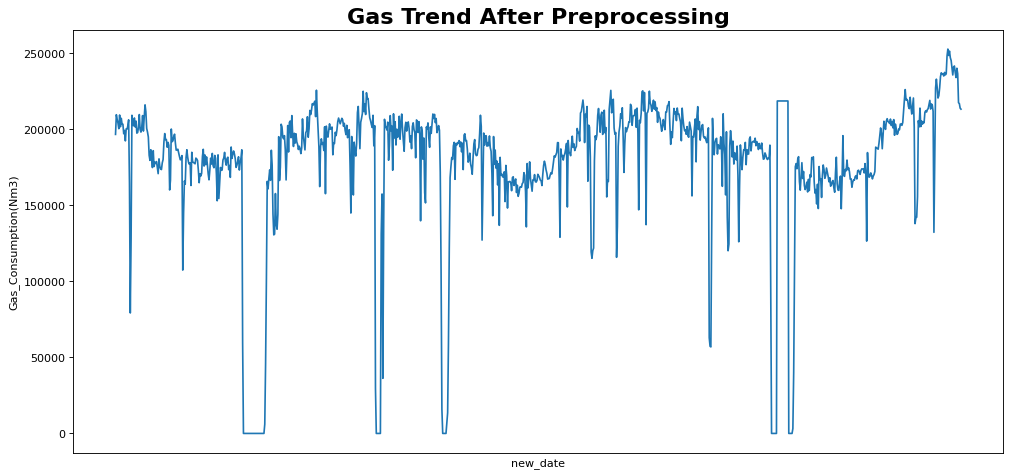

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend After Preprocessing', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )
#Download to local drive
File_Name='Gas_Trend_After_Preprocessing.jpg'
plt.savefig(File_Name)
from google.colab import files
files.download(File_Name)

In [63]:
df=df[(df['Gas_Consumption(Nm3)'] >140000)]

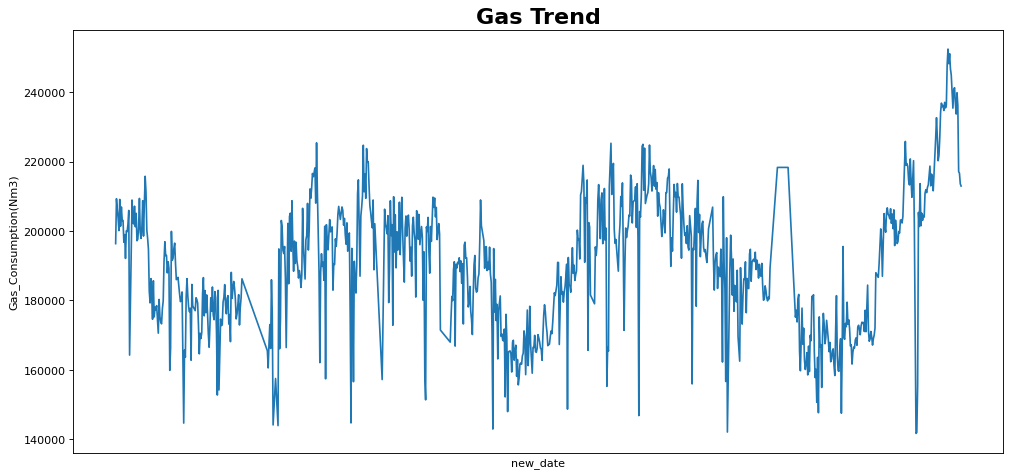

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )

In [65]:
col=df.columns
data=df.values

In [66]:
from sklearn.ensemble import IsolationForest,RandomForestRegressor,GradientBoostingRegressor
iso = IsolationForest()
yhat = iso.fit_predict(data)

In [67]:
# select all rows that are not outliers
mask = yhat != -1

In [68]:
data = data[mask, :]

In [69]:
df=pd.DataFrame(data,columns=col)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

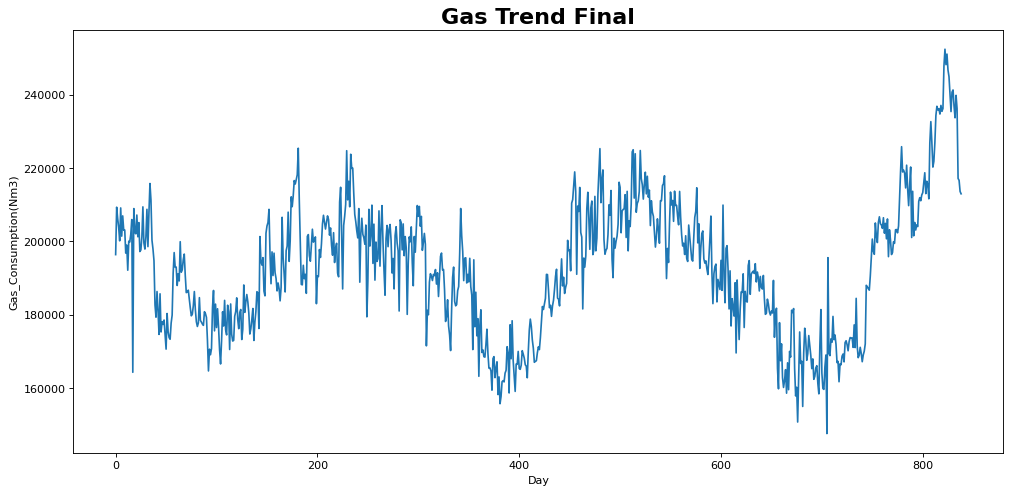

In [70]:
plt.figure(figsize=(15,7),dpi=80)
plt.title('Gas Trend Final', fontsize=20,fontweight='bold')
plt.xlabel('Day')
sns.lineplot(x=df.index, y=df.iloc[:,18], data=df )
#Download to local drive
File_Name='Gas_Trend_Final.jpg'
plt.savefig(File_Name)
from google.colab import files
files.download(File_Name)

سیو فایل نهایی در گوگل درایو

In [ ]:
#save to google drive
#from google.colab import drive
#drive.mount('drive')

In [ ]:
#df.to_csv('total.csv')
#df.to_csv('total.csv')
#!cp total.csv "drive/My Drive/"

In [ ]:
#Download to local drive
#from google.colab import files
#df.to_csv('total.csv') 
#files.download('total.csv')